In [258]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


In [259]:
ca_counties_cases_csv = "covid19cases_test.csv"


# Import us counties 
ca_counties_cases_df = pd.read_csv(ca_counties_cases_csv, encoding="utf-8")
ca_counties_cases_df.sort_values(by = 'area', ascending = True)



,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/28/2021,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,89.0,0.0,9326.0
309,6/23/2020,Alameda,County,1685886.0,150.0,3.0,4758.0,183.0,215.0,0.0,3957.0
308,6/24/2020,Alameda,County,1685886.0,181.0,1.0,4832.0,270.0,83.0,2.0,3386.0
307,6/25/2020,Alameda,County,1685886.0,163.0,1.0,4661.0,202.0,156.0,7.0,3150.0
306,6/26/2020,Alameda,County,1685886.0,191.0,2.0,4979.0,233.0,104.0,2.0,3528.0
...,...,...,...,...,...,...,...,...,...,...,...
27324,12/5/2020,Yuba,County,79290.0,42.0,0.0,193.0,38.0,50.0,0.0,301.0
27323,12/6/2020,Yuba,County,79290.0,37.0,0.0,196.0,45.0,65.0,0.0,306.0
27322,12/7/2020,Yuba,County,79290.0,44.0,0.0,475.0,58.0,88.0,0.0,314.0
27348,11/11/2020,Yuba,County,79290.0,23.0,0.0,199.0,15.0,8.0,0.0,127.0


In [260]:
ca_counties_cases_df.head()

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/28/2021,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,89.0,0.0,9326.0
1,4/27/2021,Alameda,County,1685886.0,2.0,0.0,748.0,8.0,71.0,4.0,6932.0
2,4/26/2021,Alameda,County,1685886.0,47.0,0.0,6036.0,50.0,68.0,0.0,4939.0
3,4/25/2021,Alameda,County,1685886.0,36.0,0.0,2553.0,38.0,146.0,-1.0,10474.0
4,4/24/2021,Alameda,County,1685886.0,54.0,0.0,3067.0,68.0,81.0,1.0,7720.0


In [261]:
Index(['date', 'area', 'area_type', 'population', 'cases', 'deaths', 'total_tests', 'positive_tests', 'reported_cases', 'reported_deaths', 'reported_tests'], dtype='object')

NameError: name 'Index' is not defined

In [262]:
ca_counties_cases_df.columns

Index(['date', 'area', 'area_type', 'population', 'cases', 'deaths',
       'total_tests', 'positive_tests', 'reported_cases', 'reported_deaths',
       'reported_tests'],
      dtype='object')

In [263]:
organized_cases = ca_counties_cases_df[["date", "area", "cases", "deaths", "area_type", "date", "population", "total_tests", "positive_tests", "reported_cases", "reported_deaths", "reported_tests"]]
organized_cases

,date,area,cases,deaths,area_type,date,population,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/28/2021,Alameda,0.0,0.0,County,4/28/2021,1685886.0,NaN,NaN,89.0,0.0,9326.0
1,4/27/2021,Alameda,2.0,0.0,County,4/27/2021,1685886.0,748.0,8.0,71.0,4.0,6932.0
2,4/26/2021,Alameda,47.0,0.0,County,4/26/2021,1685886.0,6036.0,50.0,68.0,0.0,4939.0
3,4/25/2021,Alameda,36.0,0.0,County,4/25/2021,1685886.0,2553.0,38.0,146.0,-1.0,10474.0
4,4/24/2021,Alameda,54.0,0.0,County,4/24/2021,1685886.0,3067.0,68.0,81.0,1.0,7720.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27628,2/5/2020,Yuba,0.0,0.0,County,2/5/2020,79290.0,0.0,0.0,0.0,0.0,NaN
27629,2/4/2020,Yuba,0.0,0.0,County,2/4/2020,79290.0,0.0,0.0,0.0,0.0,NaN
27630,2/3/2020,Yuba,0.0,0.0,County,2/3/2020,79290.0,0.0,0.0,0.0,0.0,NaN
27631,2/2/2020,Yuba,0.0,0.0,County,2/2/2020,79290.0,0.0,0.0,0.0,0.0,NaN


In [264]:
rate_table = clean_cases.pct_change(periods=1, fill_method='pad',limit=None, freq=None)
rate_table

,cases,deaths,population,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
area,,,,,,,,
Alameda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpine,-0.998981,-1.000000,-0.999337,-0.999218,-0.999633,-0.998981,-1.000000,-0.999551
Amador,40.420455,inf,33.495076,57.828806,112.000000,40.431818,inf,70.776495
Butte,2.226886,3.260870,4.651787,0.837090,1.980627,2.226001,3.260870,1.682850
Calaveras,-0.823329,-0.744898,-0.796624,-0.811185,-0.812791,-0.823329,-0.744898,-0.830978
...,...,...,...,...,...,...,...,...
Tuolumne,-0.917359,-0.936298,-0.891931,-0.821181,-0.915974,-0.917361,-0.930288,-0.862733
Unknown,-0.990568,-1.000000,-1.000000,-0.933243,-0.990604,-0.990568,-1.000000,8.000179
Ventura,2108.684211,inf,inf,211.855484,2213.363636,2108.789474,inf,1.329759


In [265]:
clean_cases = organized_cases.groupby(["area"]).sum()
clean_cases

,cases,deaths,population,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
area,,,,,,,,
Alameda,86386.0,1259.0,763706358.0,2495045.0,100750.0,86390.0,1260.0,2121033.0
Alpine,88.0,0.0,506001.0,1951.0,37.0,88.0,0.0,953.0
Amador,3645.0,46.0,17454543.0,114775.0,4181.0,3646.0,46.0,68403.0
Butte,11762.0,196.0,98649357.0,210852.0,12462.0,11762.0,196.0,183515.0
Calaveras,2078.0,50.0,20062917.0,39812.0,2333.0,2078.0,50.0,31018.0
...,...,...,...,...,...,...,...,...
Tuolumne,4029.0,53.0,23715003.0,95465.0,4683.0,4029.0,58.0,61501.0
Unknown,38.0,0.0,0.0,6373.0,44.0,38.0,0.0,553520.0
Ventura,80168.0,987.0,386294391.0,1356528.0,97432.0,80172.0,1000.0,1289568.0


ValueError: x and y must have same first dimension, but have shapes (61,) and (62,)

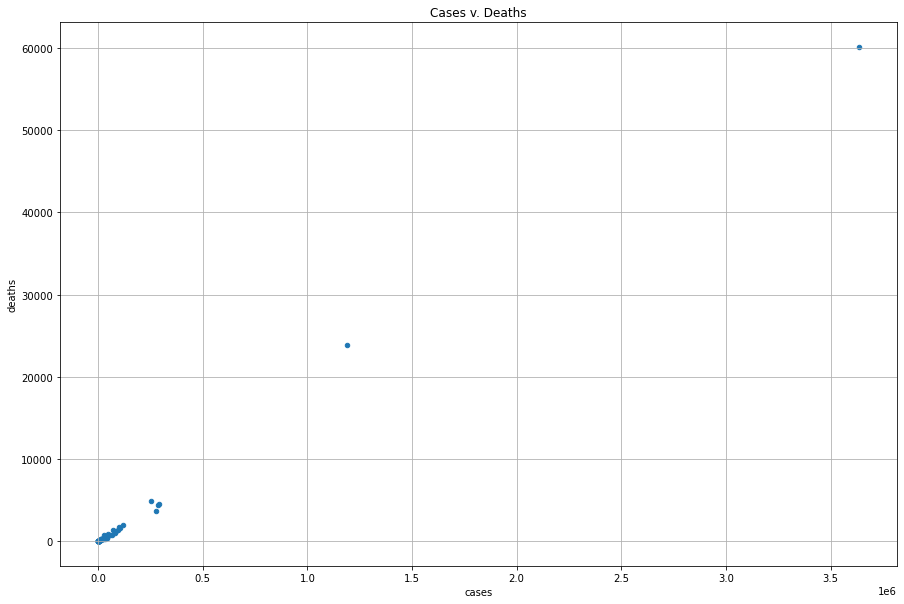

In [281]:
# Question 3
# scatter plot 2 
clean_cases.plot(kind="scatter", x="cases", y="deaths", grid=True, figsize=(15,10), title="Cases v. Deaths")


#linear regre. 
# Calculate the correlation coefficient and linear regression model
# for case and death for by county
x_values = clean_cases['cases']
y_values = clean_cases['deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.xlabel('Reported Cases')
plt.ylabel('Reported Deaths')

#save image and show plot
plt.savefig("jessica5.png")
plt.show()

In [ ]:
print 

In [267]:
total_death = clean_cases['deaths'].sum()
print(total_death)

120254.0


In [268]:
pos_tests = clean_cases['positive_tests'].sum()
print(pos_tests)

8718498.0


In [269]:
pos_death = clean_cases.groupby(["deaths"] , ["positive_tests"].count()).tolist()
pos_death

TypeError: count() takes exactly one argument (0 given)

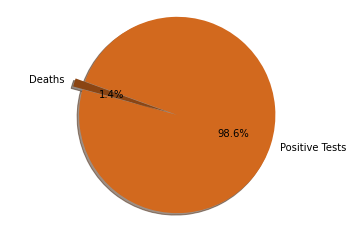

In [270]:
labels = ["Deaths", "Positive Tests"]
values = ["120254", "8718498"]
colors = ["saddlebrown", "chocolate"]
explode = (0.1, 0)

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,startangle=160)
plt.axis("equal")

plt.savefig("circle.png")
plt.show()

In [271]:
#Compare DEATHS/CASE %change by county
# Formula =  new-old / old * 100

ca_case_rate = -((clean_cases['reported_cases'] - clean_cases['reported_tests']) / (clean_cases['reported_tests'])) * 100
ca_case_rate

area
Alameda      95.926985
Alpine       90.766002
Amador       94.669824
Butte        93.590715
Calaveras    93.300664
               ...    
Tuolumne     93.448887
Unknown      99.993135
Ventura      93.783034
Yolo         96.343787
Yuba         90.274157
Length: 61, dtype: float64

In [272]:
#Compare DEATHS %Rate by county
# Formula = old - new / old * 100

ca_death_rate = -((clean_cases['reported_deaths'] - clean_cases['total_tests']) / (clean_cases['total_tests'])) * 100
ca_death_rate 


area
Alameda       99.949500
Alpine       100.000000
Amador        99.959922
Butte         99.907044
Calaveras     99.874410
                ...    
Tuolumne      99.939245
Unknown      100.000000
Ventura       99.926282
Yolo          99.949059
Yuba          99.934099
Length: 61, dtype: float64

In [273]:
#Compare Vaccination %Rate by county
# Formula = old - new / old * 100

ca_covid_rate = ((ca_covid_test['cumulative_unvax_total_pop'] - ca_covid_test['fully_vaccinated']) / (ca_covid_test['cumulative_unvax_total_pop'])) * 100
ca_covid_rate 

county
Alameda            99.715495
Alpine             99.679128
Amador             99.816020
Butte              99.807605
Calaveras          99.799236
Colusa             99.863840
Contra Costa       99.686772
Del Norte          99.867217
El Dorado          99.788367
Fresno             99.805376
Glenn              99.843732
Humboldt           99.783681
Imperial           99.854261
Inyo               99.757336
Kern               99.845117
Kings              99.895902
Lake               99.805643
Lassen             99.886181
Los Angeles        99.772391
Madera             99.827816
Marin              99.634141
Mariposa           99.876721
Mendocino          99.724938
Merced             99.884320
Modoc              99.836678
Mono               99.593939
Monterey           99.780893
Napa               99.694059
Nevada             99.788033
Orange             99.754339
Placer             99.764299
Plumas             99.766283
Riverside          99.831347
Sacramento         99.792612
San Ben

In [274]:
print(ca_counties_cases_df)

            date     area area_type  population  cases  deaths  total_tests  \
0      4/28/2021  Alameda    County   1685886.0    0.0     0.0          NaN   
1      4/27/2021  Alameda    County   1685886.0    2.0     0.0        748.0   
2      4/26/2021  Alameda    County   1685886.0   47.0     0.0       6036.0   
3      4/25/2021  Alameda    County   1685886.0   36.0     0.0       2553.0   
4      4/24/2021  Alameda    County   1685886.0   54.0     0.0       3067.0   
...          ...      ...       ...         ...    ...     ...          ...   
27628   2/5/2020     Yuba    County     79290.0    0.0     0.0          0.0   
27629   2/4/2020     Yuba    County     79290.0    0.0     0.0          0.0   
27630   2/3/2020     Yuba    County     79290.0    0.0     0.0          0.0   
27631   2/2/2020     Yuba    County     79290.0    0.0     0.0          0.0   
27632   2/1/2020     Yuba    County     79290.0    0.0     0.0          0.0   

       positive_tests  reported_cases  reported_dea

In [275]:
#Run for Question 3
ca_rate_comp = pd.DataFrame({"Cases":ca_case_rate, "Deaths":ca_death_rate, "Vaccinations": ca_covid_rate})
ca_rate_comp.head(61)

,Cases,Deaths,Vaccinations
Alameda,95.926985,99.949500,99.715495
Alpine,90.766002,100.000000,99.679128
Amador,94.669824,99.959922,99.816020
Butte,93.590715,99.907044,99.807605
Calaveras,93.300664,99.874410,99.799236
...,...,...,...
Tulare,89.118334,99.844155,99.826991
Tuolumne,93.448887,99.939245,99.789584
Unknown,99.993135,100.000000,NaN
Ventura,93.783034,99.926282,99.744547


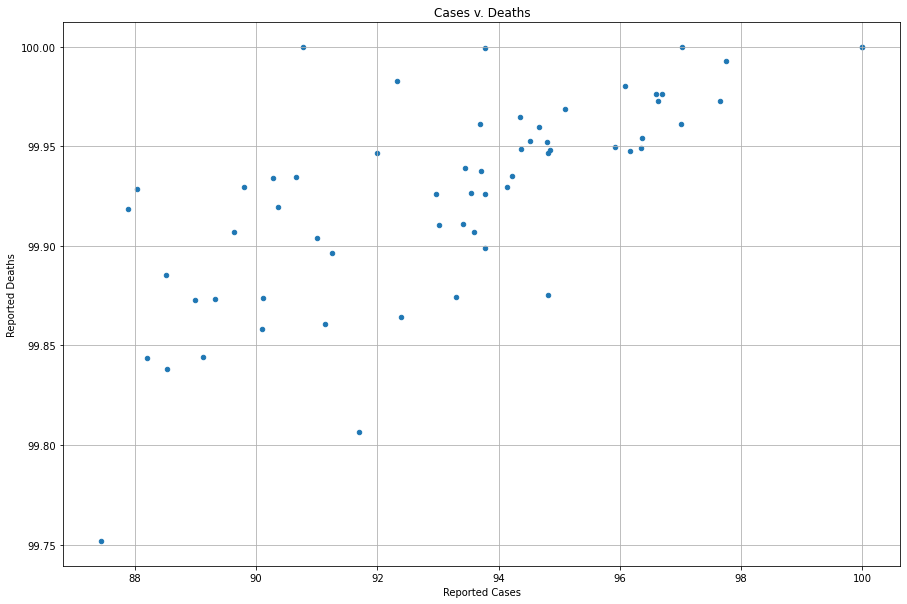

In [276]:
# Question 3
# Finally making the scatter plot 
ca_rate_comp.plot(kind="scatter", x="Cases", y="Deaths", grid=True, figsize=(15,10), title="Cases v. Deaths")


#linear regre. 
# Calculate the correlation coefficient and linear regression model
# for case and death for by county
x_values = ca_rate_comp['Cases']
y_values = ca_rate_comp['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.xlabel('Reported Cases')
plt.ylabel('Reported Deaths')



#save image and show plot

plt.savefig("jessica.png")
plt.show()


In [196]:
#Print lin regr. 

#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)

#plt.annotate(line_eq,(5,255),fontsize=8, color="red")

In [ ]:
(ca_covid_test['fully_vaccinated'] / ca_covid_test['cumulative_unvax_total_pop'].sum()) * 100
ca_covid_rate 
